<a href="https://colab.research.google.com/github/fermariadon/analistaDados/blob/main/projeto_parceria_m25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Título do Projeto:** Previsão de Demanda de Bicicletas em uma Cidade

**Contexto:**
Imagine que uma empresa de compartilhamento de bicicletas deseja otimizar a distribuição de suas bicicletas em uma cidade. Para fazer isso de forma eficaz, eles precisam prever a demanda de bicicletas em diferentes estações de aluguel em horários específicos do dia e dias da semana.

**Problema:**
O problema é prever a quantidade de bicicletas que serão alugadas em cada estação de aluguel, com base em informações como horário do dia, dia da semana, condições climáticas, feriados, etc. Isso ajudará a empresa a redistribuir suas bicicletas de forma mais eficiente, garantindo que haja bicicletas disponíveis onde e quando são mais necessárias.

Passo 1: Coleta de Dados
Neste exemplo, temos um arquivo CSV chamado dados_aluguel_bicicletas.csv contendo os dados históricos de aluguel de bicicletas.

In [2]:
import pandas as pd

# Carregar os dados
data = pd.read_csv('dados_aluguel_bicicletas.csv')

# Visualizar os primeiros registros do dataframe
print(data.head())


   hora dia_semana condicoes_climaticas  bicicletas_alugadas
0     6    Domingo              Nublado                   17
1    19    Segunda              Chuvoso                   18
2    14      Terça           Ensolarado                   30
3    10     Sábado           Ensolarado                   18
4     7     Sábado           Ensolarado                   48


**Passo 2: Modelagem**
Regressão linear como modelo de machine learning.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar os dados
data = pd.read_csv('dados_aluguel_bicicletas.csv')

# Converter variáveis categóricas em variáveis dummy
data = pd.get_dummies(data, columns=['dia_semana', 'condicoes_climaticas'], drop_first=True)

# Dividir os dados em features (X) e target (y)
X = data.drop('bicicletas_alugadas', axis=1)
y = data['bicicletas_alugadas']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
predictions = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 209.32005031347506


**Passo 3: Visualização de Dados**
Gráfico de dispersão para comparar os valores reais com as previsões feitas pelo modelo.

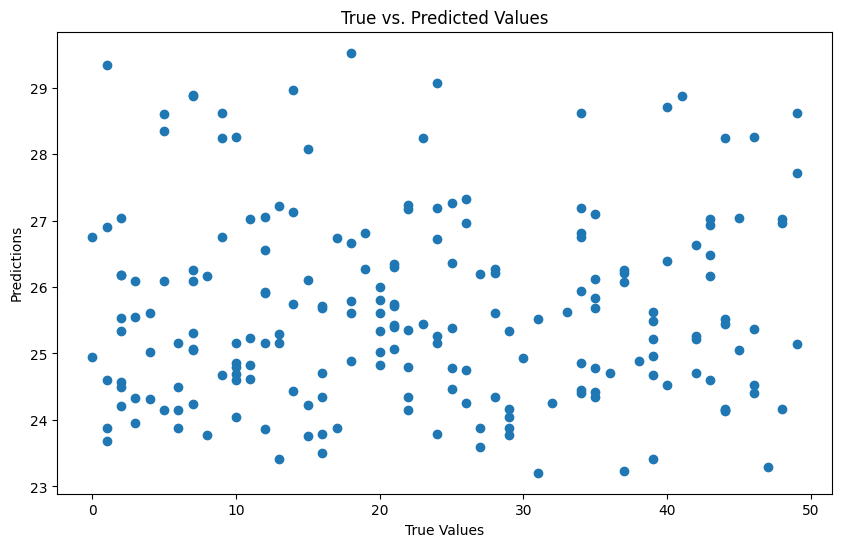

In [6]:
import matplotlib.pyplot as plt

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()
